## Описание проекта

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

## Описание данных

Таблица rest_data:

- id — идентификатор объекта
- object_name — название объекта общественного питания
- chain — сетевой ресторан
- object_type — тип объекта общественного питания
- address — адрес
- number — количество посадочных мест

ССЫЛКА НА ПРЕЗЕНТАЦИЮ: https://disk.yandex.ru/i/kOKPVAZvDike2g

## Открытие и предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import datetime as dt
import scipy.stats as stats

In [2]:
rest_data = pd.read_csv('/datasets/rest_data.csv')
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [3]:
rest_data.head(20)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


In [4]:
#приведем все названия объектов общ. пит. к нижнему регистру
rest_data['object_name'] = rest_data['object_name'].str.lower()

In [5]:
#Проверяем на пропуски
rest_data.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [6]:
#проверяем на дубликаты
rest_data.duplicated().sum() 

0

In [7]:
rest_data['number'].value_counts(ascending = False)

0      1621
40      835
20      727
30      685
10      644
       ... 
491       1
675       1
455       1
167       1
495       1
Name: number, Length: 315, dtype: int64

In [8]:
zero = rest_data[rest_data['number'] == 0]

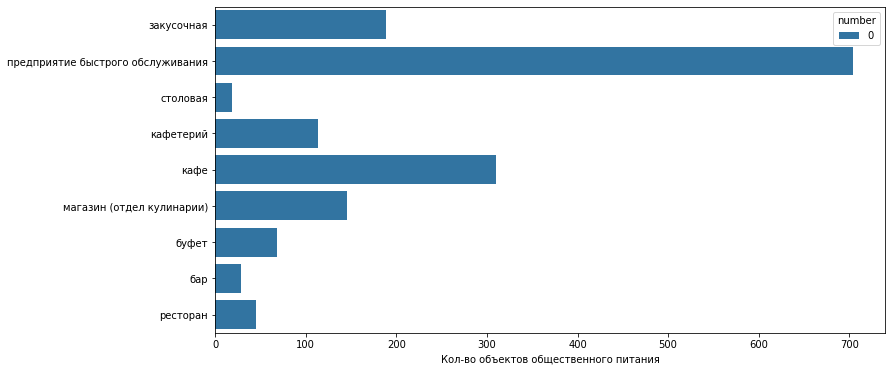

In [9]:
#Посмотрим, для каких объектов характерно отсутствие посадочных мест
plt.figure(figsize = (12,6))
sns.countplot(y='object_type', hue='number', data=zero)
plt.ylabel('')
plt.xlabel('Кол-во объектов общественного питания')
plt.show()

In [10]:
rest_data['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

### Вывод

В преобработке данных были приведены названия столбцов к нижнему регистру, а также проверили наличие пропусков и дубликатов, которых не оказалось. Можно было бы столбец chain поменять на тип данных булев массив, но я не вижу в этом надобности. В конце построен график видов объектов общ. питания, у которых отсутствуют посадочные места, в основном это наблюдается у предприятий быстрого обслуживания.

## Анализ данных

### Исследуем соотношение видов объектов общественного питания по количеству. Построим график.

In [11]:
#Процентная составляющая видов объектов общ. питания
print(rest_data['object_type'].value_counts(ascending = False) / rest_data['object_type'].count() * 100) 

кафе                                 39.691527
столовая                             16.835871
ресторан                             14.870493
предприятие быстрого обслуживания    12.514643
бар                                   5.570741
буфет                                 3.807107
кафетерий                             2.590134
закусочная                            2.342835
магазин (отдел кулинарии)             1.776650
Name: object_type, dtype: float64


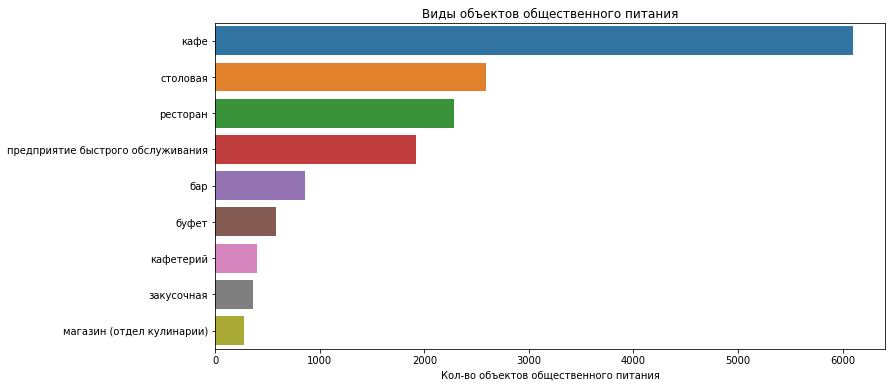

In [12]:
plt.figure(figsize = (12,6))
sns.countplot(y='object_type', data=rest_data, 
              order = rest_data['object_type'].value_counts().index)
plt.xlabel('Кол-во объектов общественного питания')
plt.ylabel('')
plt.title('Виды объектов общественного питания')
plt.show()

Большую часть объектов общ. питания занимают кафе, далее идут столовые, рестораны и т.д., меньше всего мы имеем закусочных и магазинов(отделов кулинарии).

### Исследуем соотношение сетевых и несетевых заведений по количеству.

In [13]:
rest_data['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

In [14]:
#Процент сетевых заведений
rest_data[rest_data['chain'] == "да"]['object_type'].count() / rest_data['object_type'].count() * 100

19.315371599635558

In [15]:
#Процент несетевых заведений
rest_data[rest_data['chain'] == "нет"]['object_type'].count() / rest_data['object_type'].count() * 100

80.68462840036445

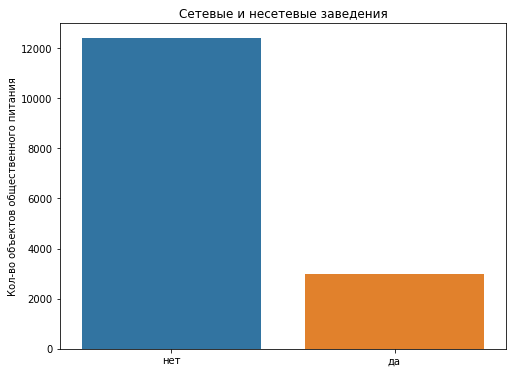

In [16]:
plt.figure(figsize = (8,6))
sns.countplot(x='chain', data = rest_data)
plt.ylabel('Кол-во объектов общественного питания')
plt.xlabel('')
plt.title('Сетевые и несетевые заведения')
plt.show()

Мы можем наблюдать доминацию несетевых заведений над сетевыми, т.к. несетевых 12398 заведений, а сетевых в 4 раза меньше, т.е. 2968.

### Рассмотрим для какого вида объекта общественного питания характерно сетевое распространение

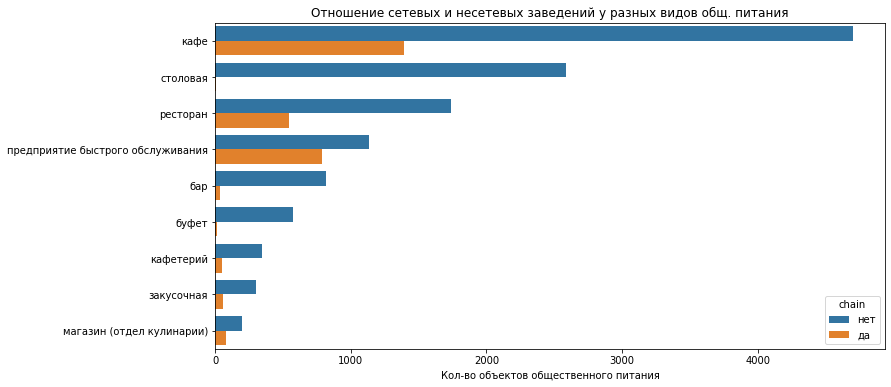

In [17]:
plt.figure(figsize = (12,6))
sns.countplot(y='object_type', hue='chain', data=rest_data, 
              order = rest_data['object_type'].value_counts().index)
plt.xlabel('Кол-во объектов общественного питания')
plt.ylabel('')
plt.title('Отношение сетевых и несетевых заведений у разных видов общ. питания')
plt.show()

In [18]:
#Процент сетевых заведений по типу объекта общ. питания
(rest_data[rest_data['chain'] == 'да']['object_type'].value_counts() / 
    rest_data['object_type'].value_counts() * 100).sort_values(ascending = False)

предприятие быстрого обслуживания    41.133645
магазин (отдел кулинарии)            28.571429
ресторан                             23.807440
кафе                                 22.888998
закусочная                           15.555556
кафетерий                            13.065327
бар                                   4.322430
буфет                                 1.880342
столовая                              0.115964
Name: object_type, dtype: float64

Исходя из нашего исследования, делаем вывод, что наибольшая предрасположенность к сетевому типу среди всех видов общ. питания у преприятий быстрого обслуживания, процент сетевых заведений относитено несетевых у них наибольшая и составляет 41%. Магазины, рестораны и кафе имеют 20-30% сетевых заведений относительно несетевых. А бары, буфеты и столовые совершенно не придерживается к сетевому типу заведений их процент составляет 4%, 1% и 0.1% соотвественно.

### Узнаем, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест

In [19]:
chain_objects = rest_data[rest_data['chain'] == 'да'].groupby('object_name').agg({'object_name':'count', 'number':'median'})
chain_objects.columns = ['objects', 'median_number']

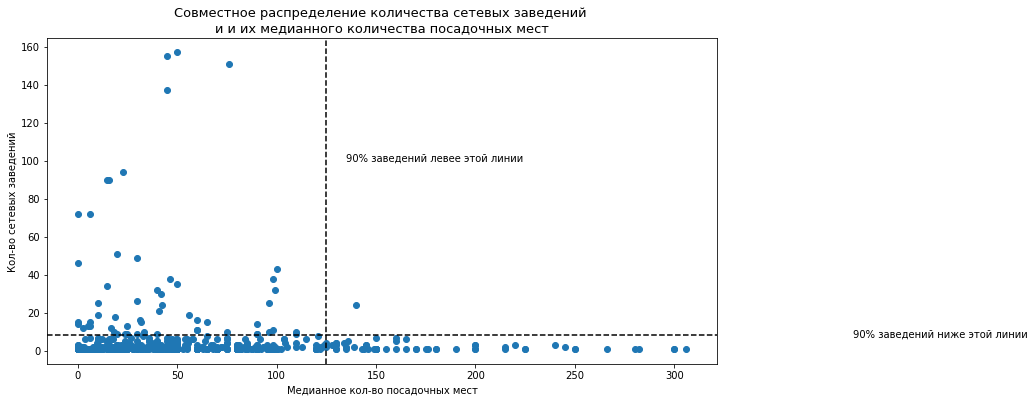

In [20]:
plt.figure(figsize=(12,6))
plt.scatter(chain_objects['median_number'], chain_objects['objects'])
plt.xlabel('Медианное кол-во посадочных мест')
plt.ylabel('Кол-во сетевых заведений')
plt.title('Совместное распределение количества сетевых заведений \nи и их медианного количества посадочных мест', fontsize=13)
plt.axhline(np.percentile(chain_objects['objects'], 90), linestyle='--', color='black')
plt.axvline(np.percentile(chain_objects['median_number'], 90), linestyle='--', color='black')
plt.text(390, 7, '90% заведений ниже этой линии')
plt.text(135, 100, '90% заведений левее этой линии')
plt.show()

In [21]:
print(int(np.percentile(chain_objects['median_number'], 90)))
print(int(np.percentile(chain_objects['objects'], 90)))

125
8


У 90% процентов сетевых предприятий общ. питания меньше 125 посадочных мест и 8 заведений. Следовательно, делаем вывод, что более характерно для сетевых заведений - мало заведений с большим кол-вом мест.

### Опишем для каждого вида объекта общественного питания среднее кол-во посадочных мест

In [22]:
data_object_number = rest_data.pivot_table(index = 'object_type', 
                                           values = 'number', 
                                           aggfunc = 'mean').sort_values(by='number', ascending=False).reset_index()

In [23]:
data_object_number

,object_type,number
0,столовая,130.246618
1,ресторан,96.834136
2,буфет,51.129915
3,бар,43.494159
4,кафе,39.716019
5,предприятие быстрого обслуживания,20.552262
6,кафетерий,9.123116
7,закусочная,7.608333
8,магазин (отдел кулинарии),5.589744


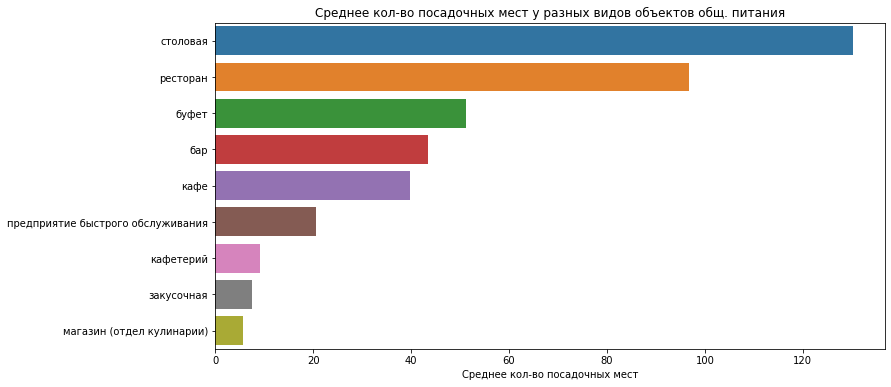

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(y = "object_type", x = 'number', data = data_object_number)
plt.xlabel('Среднее кол-во посадочных мест')
plt.ylabel('')
plt.title('Среднее кол-во посадочных мест у разных видов объектов общ. питания')
plt.show()

Наибольшее среднее кол-во посадочных мест у столовой, что характерно, далее идут рестораны, буфеты и т.д. В целом, среднее кол-во у всех видов объектов общ. питания выглядят логично.

### Cоздадим отдельный столбец с информацией об улице

In [25]:
#Cоздаем столбец street
rest_data['street'] = rest_data['address'].apply(lambda x: x.split(', ')[1])

In [26]:
rest_data

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,поселение Московский


In [27]:
rest_data1 = rest_data.loc[rest_data['street'] != 'город Зеленоград']
rest_data2 = rest_data1.loc[rest_data['street'] != 'поселение Сосенское']

Был создан столбец с информацией об улице заведений, а также убраны город Зеленоград и поселение Сосенское, т.к. мы не можем их отнести к улицам.

### Найдем топ 10 улиц по кол-ву объектов общественного питания, а также рассмотрим в каких районах они находятся.

In [28]:
rest_data2['street'].value_counts().sort_values(ascending = False).head(10)

проспект Мира             204
Профсоюзная улица         182
Ленинградский проспект    171
Пресненская набережная    167
Варшавское шоссе          161
Ленинский проспект        147
проспект Вернадского      132
Кутузовский проспект      114
Каширское шоссе           112
Кировоградская улица      110
Name: street, dtype: int64

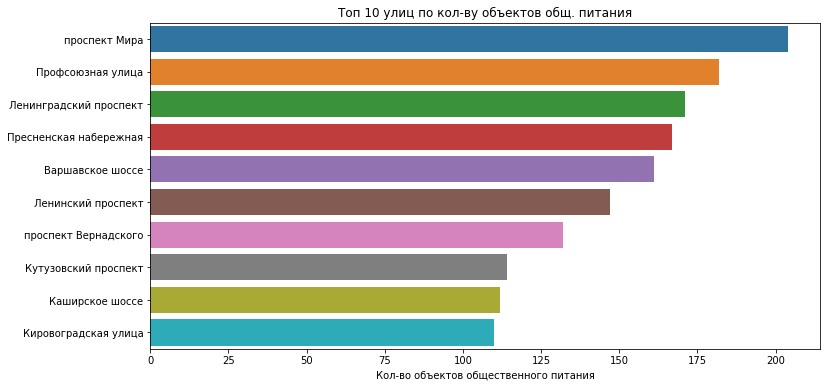

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(y='street', data=rest_data2, 
              order = rest_data2['street'].value_counts().head(10).index)
plt.xlabel('Кол-во объектов общественного питания')
plt.ylabel('')
plt.title('Топ 10 улиц по кол-ву объектов общ. питания')
plt.show()

In [30]:
#Загружаем таблицу с улицами, районами и округами.
street = pd.read_csv('http://hubofdata.ru/storage/f/2013-10-22T09%3A25%3A27.793Z/mosgaz-streets.csv')
street.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 4 columns):
streetname    4398 non-null object
areaid        4398 non-null int64
okrug         4398 non-null object
area          4398 non-null object
dtypes: int64(1), object(3)
memory usage: 137.6+ KB


In [31]:
street.groupby('streetname')['area'].count().sort_values(ascending = False)

streetname
Московская Кольцевая Автодорога                    42
Малое кольцо Московской железной дороги (МКМЖД)    40
Варшавское шоссе                                    8
Ленинский проспект                                  8
Волгоградский проспект                              7
                                                   ..
Петровско-Разумовский проезд                        1
Петровско-Разумовская аллея                         1
Петровский переулок                                 1
Петровский бульвар                                  1
1-й Автозаводский проезд                            1
Name: area, Length: 3604, dtype: int64

In [32]:
street.rename(columns = {'streetname':'street'}, inplace = True)

In [33]:
#Cоединяем две наши таблицы по улице
rest_data_new = rest_data2.merge(street, on = 'street') 
rest_data_new

,id,object_name,chain,object_type,address,number,street,areaid,okrug,area
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,86,СВАО,Ярославский Район
1,193477,grill-house,нет,закусочная,"город Москва, улица Егора Абакумова, дом 14А",0,улица Егора Абакумова,86,СВАО,Ярославский Район
2,196756,пекарня,нет,кафетерий,"город Москва, улица Егора Абакумова, дом 14А",12,улица Егора Абакумова,86,СВАО,Ярославский Район
3,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,18,ЦАО,Таганский район
4,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,117,ЮВАО,Нижегородский район
...,...,...,...,...,...,...,...,...,...,...
28887,213369,великолепный век,нет,ресторан,"город Москва, улица Кожевнический Вражек, дом 3А",38,улица Кожевнический Вражек,98,ЮАО,Даниловский район
28888,206426,чайхана «мантыбар»,нет,ресторан,"город Москва, улица Кожевнический Вражек, дом 3А",30,улица Кожевнический Вражек,98,ЮАО,Даниловский район
28889,214324,кадаши ( закрытый),нет,ресторан,"город Москва, 2-й Кадашёвский переулок, дом 16...",15,2-й Кадашёвский переулок,21,ЦАО,Район Якиманка
28890,213851,ресторан «атмосфера»,нет,ресторан,"город Москва, улица Василисы Кожиной, дом 1, к...",49,улица Василисы Кожиной,48,ЗАО,Район Филевский Парк


In [34]:
#Избавляемся от дубликатов
rest_data_new = rest_data_new.drop_duplicates()

In [35]:
rest_data_new.duplicated().sum()

0

In [36]:
rest_area = rest_data_new.pivot_table(index=['street','area', 'okrug'], values='number', aggfunc='count') \
.sort_values(by='number', ascending=False).reset_index()

In [50]:
rest_area['okrug'].value_counts()

ЦАО           641
ВАО           258
СВАО          246
САО           238
ЮАО           225
ЮВАО          190
ЗАО           187
ЮЗАО          168
СЗАО          110
Зеленоград     14
Name: okrug, dtype: int64

In [37]:
rest_area1 = rest_area.query("number >= 110")
rest_area1

,street,area,okrug,number
0,проспект Мира,Алексеевский район,СВАО,204
1,проспект Мира,Мещанский район,ЦАО,204
2,проспект Мира,Останкинский район,СВАО,204
3,проспект Мира,Район Марьина роща,СВАО,204
4,проспект Мира,Район Ростокино,СВАО,204
5,проспект Мира,Район Свиблово,СВАО,204
6,проспект Мира,Ярославский Район,СВАО,204
7,Профсоюзная улица,Район Ясенево,ЮЗАО,182
8,Профсоюзная улица,Район Черемушки,ЮЗАО,182
9,Профсоюзная улица,Академический район,ЮЗАО,182


In [38]:
rest_area1['area'].value_counts()

Район Чертаново Центральное        2
Район Проспект Вернадского         2
Обручевский район                  2
Район Чертаново Южное              2
Район Тропарево-Никулино           2
Район Теплый Стан                  2
Район Чертаново Северное           2
Район Нагатино-Садовники           2
Ломоносовский район                2
Донской район                      2
Район Гагаринский                  2
Нагорный район                     1
Район Раменки                      1
Академический район                1
Район Сокол                        1
Район Беговой                      1
Район Аэропорт                     1
Алексеевский район                 1
Район Ясенево                      1
Район Орехово-Борисово Южное       1
Пресненский район                  1
Район Марьина роща                 1
Район Дорогомилово                 1
Район Коньково                     1
Район Черемушки                    1
Район Орехово-Борисово Северное    1
Район Северное Бутово              1
Я

In [39]:
rest_area1['okrug'].value_counts()

ЮАО     14
ЮЗАО    14
ЗАО      7
СВАО     6
САО      4
ЦАО      3
Name: okrug, dtype: int64

На нашем графике можно увидеть топ 10 улиц по кол-ву размещенных на них объектах, лидером является Проспект мира, на которой находится целых 204 заведения общ. питания. Далее, рассмотрены районы, в которых находятся эти улицы. Для этого загружена таблица с информацией об округе и районе улиц Москвы, которую присоединили к нашей исходной. Было замечено, что многие улицы находятся на нескольких районах, даже если не брать в счет те улицы, которые можно отнести к "городским трассам". Затем улицы отсортированы по райнам, на которых они находятся. Но по-моему лучше рассмотреть по округу, так картина будет яснее. Поэтому мы можем заметить, что в основном наш топ 10 улиц расположен от юга до запада Москвы.

### Найдем число улиц с одним объектом общественного питания, а также рассмотрим их районы.

In [40]:
#Cделаем срез данных: улицы, на которых расположен только 1 объект общ. питания.
rest_1 = rest_area[rest_area['number'] == 1]
rest_1['number'].count()

560

In [41]:
rest_1

,street,area,okrug,number
1717,улица Николаева,Пресненский район,ЦАО,1
1718,1-я Напрудная улица,Лосиноостровский район,СВАО,1
1719,1-й Вешняковский проезд,Рязанский район,ЮВАО,1
1720,улица Можайский Вал,Район Дорогомилово,ЗАО,1
1721,1-й Балтийский переулок,Район Аэропорт,САО,1
...,...,...,...,...
2272,Тихвинский переулок,Тверской район,ЦАО,1
2273,Тихий тупик,Таганский район,ЦАО,1
2274,Триумфальная площадь,Тверской район,ЦАО,1
2275,Троилинский переулок,Район Арбат,ЦАО,1


In [42]:
rest_1['area'].unique()

array(['Пресненский район', 'Лосиноостровский район', 'Рязанский район',
       'Район Дорогомилово', 'Район Аэропорт', 'Нижегородский район',
       'Район Солнцево', 'Район Богородское', 'Район Щукино',
       'Район Преображенское', 'Бутырский район', 'Район Марьина роща',
       'Район Замоскворечье', 'Район Якиманка', 'Донской район',
       'Район Царицыно', 'Район Хорошево-Мневники', 'Район Свиблово',
       'Район Беговой', 'Район Кузьминки', 'Таганский район',
       'Красносельский район', 'Тимирязевский Район', 'Район Гольяново',
       'Район Сокольники', 'Район Косино-Ухтомский', 'Басманный район',
       'Можайский Район', 'Район Митино', 'Район Печатники',
       'Мещанский район', 'Хорошевский район', 'Район Северное Измайлово',
       'Район Южное Бутово', 'Район Москворечье-Сабурово',
       'Район Кунцево', 'Район Лефортово', 'Район Хамовники',
       'Алексеевский район', 'Район Текстильщики', 'Район Ростокино',
       'Район Северное Бутово', 'Район Арбат', 'Район 

In [43]:
rest_1['okrug'].value_counts()

ЦАО           185
ВАО            72
СВАО           67
ЮВАО           55
САО            55
ЗАО            41
ЮАО            30
СЗАО           27
ЮЗАО           27
Зеленоград      1
Name: okrug, dtype: int64

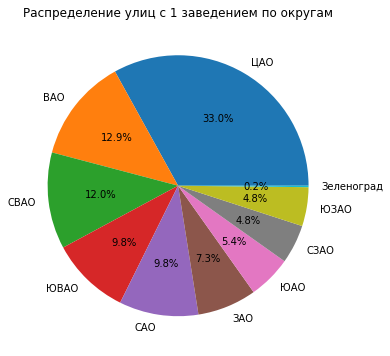

In [44]:
okrug_chart = rest_1[rest_1['number'] == 1]['okrug'].value_counts()
plt.figure(figsize = (6,6))
okrug_chart.plot.pie(autopct="%.1f%%")

plt.title('Распределение улиц с 1 заведением по округам')
plt.xlabel('')
plt.ylabel('');

В данной части работы мы нашли кол-во улиц с одним объектом общ. питания, их число составило 560. Также составлен список районов, на которых они находятся, а также округа. В итоге наблюдаем, что большая часть таких улиц расположена в центре Москвы, т.к. в самом центре мы имеем самые короткие улицы. И скорее всего в центре Москвы объекты общ. питания распределены на конкретные улицы, поэтому мы можем встретить, те самые выбивающиеся из общего строя ресторанчики на конкретных улицах.

### Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.

In [45]:
#Найдем топ 10 улиц по кол-ву объектов общ. питания, расположенных на них.
top_ten = rest_data2.pivot_table(index='street', values='number', aggfunc='count')\
.sort_values(by='number', ascending=False).reset_index().head(10)

In [46]:
top10_streets_list = top_ten['street'].to_list()

In [47]:
top10_streets_data = rest_data2.query('street in @top10_streets_list')

In [48]:
top10_streets_data['number'].median()

40.0

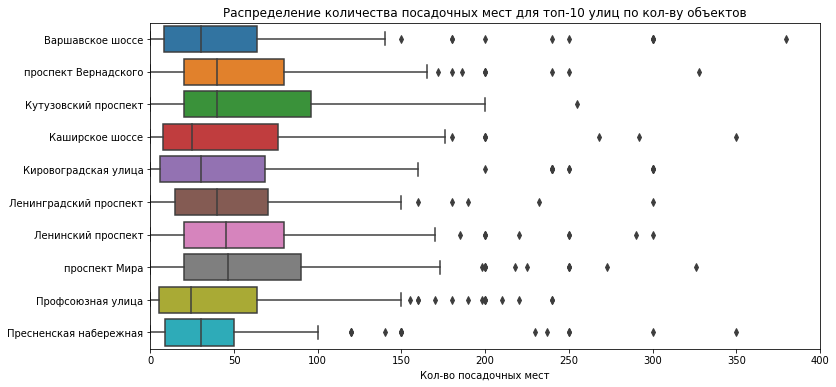

In [49]:
top10_streets_data['number'].median()
rest_data2['number'].median()
plt.figure(figsize=(12,6))
plt.xlim(0,400)
sns.boxplot(data=top10_streets_data, x='number', y='street')
plt.title('Распределение количества посадочных мест для топ-10 улиц по кол-ву объектов')
plt.ylabel('')
plt.xlabel('Кол-во посадочных мест')
plt.show()

На последнем этапе нашей работы мы построили распределение кол-ва посадочных мест для топ 10 улиц по кол-ву объектов. Медианное значение кол-ва посадочных мест для нашего топа - 40. Также заметим, что медианные значения у всех улиц, примерно одинаковые. И 75% заведений на наших улицах имеют не более 100 посадочных мест. И последнем пунктом можно выделить, что на всех улицах присутствуют заведения, которые имеют больше 200-та и даже 300-та посадочных мест.

## Общий вывод

Дадим рекомендации о виде заведения, количестве посадочных мест, а также районе расположения, исходя из наших выводов.

Мы имеем следующее соотношение видов объектов общ. питания:

- кафе                                 39.7%

- столовая                             16.8%

- ресторан                             14.9%

- предприятие быстрого обслуживания    12.5%

- бар                                   5.6%

- буфет                                 3.8%

- кафетерий                             2.6%

- закусочная                            2.3%

- магазин (отдел кулинарии)             1.8%

В основном преобладают несетевые заведения их 12398, а сетевых 2968.
Сетевой тип заведений характерен для предприятий быстрого обслуживания 41%. В меньшей мере оно характерно для магазинов 29%, ресторанов 24%  и кафе 23% заведений и совершенно не характерно для буфетов 4%, баров 2% и столовых 0.1%.

Если рассматривать среднее кол-во посадочных мест по виду объекта общ. питания, то мы имеем следующую картину:
    
- столовая	130

- ресторан	96

- буфет	51

- бар	43

- кафе	39

- предприятие быстрого обслуживания	20

- кафетерий	9

- закусочная	7

- магазин (отдел кулинарии)	5

Выделяем непосредественного лидера - столовая, далее идут рестораны, буфеты, бары и кафе, менее 20-30 мест в среднем мы рассматривать не будем.

Топ-10 улиц по кол-ву объектов общ. питания, расположенных на них.

- проспект Мира             204

- Профсоюзная улица         182

- Ленинградский проспект    171

- Пресненская набережная    167

- Варшавское шоссе          161

- Ленинский проспект        147

- проспект Вернадского      132

- Кутузовский проспект      114

- Каширское шоссе           112

- Кировоградская улица      110

Также у нас есть информации о районах и округах, на которых находятся эти улицы.

Далее выделили улицы с одним объектом общ. питания, их кол-во составило 560, а также представлен список районов и кол-во этих улиц по округам. 

Медианное значение кол-ва посадочных мест в топ-10 улицах по кол-ву заведений составляет 40 мест.

 По-моему, у нас недостаточно данных, чтобы однозначно выявить лучшую стратегию для открытия объекта общественного питания. Если основываться на наших результатах, то я предлагаю следующее. Т.к. кафе самые популярные, то я предлагаю остановиться на этом варианте, также у кафе в среднем кол-во посадочных мест около 40. Что касается района расположения нашего заведения, то тут все намного сложней, т.к. мы имеем множество нюансов. Мы можем рассмотреть районы с наибольшим кол-вом заведений, но вероятно, что будет большая конкуренция, а если мы будем рассматривать менее популярные районы, то это может отразиться на кол-ве посетителей нашего кафе. Но исходя из множества факторов, я бы обратил внимание на ЦАО Москвы. У нас будет возможность открыть сеть наших кафе, судя по тенденции, но их не должно быть большое кол-во, т.к. это нарушит концепцию и уникальность нашего заведения с роботами-официантами.